In [1]:
import numpy as np
import matplotlib.pyplot as plt

from createData import createDataLinear, createDataCircular
from feedforward import FeedForwardNN, BCELoss

np.set_printoptions(precision = 4, suppress = True)

input [0.64314746 0.75677233]
weights [array([[-0.63739055, -0.22714635],
       [-0.15150619,  0.00556958],
       [ 0.05801456, -0.09551951]]), array([[-0.11028535,  0.52038179,  0.30685076],
       [ 0.14719205, -0.38536819, -0.06668811],
       [-0.57128715, -0.50383565,  0.20210617]]), array([[ 0.25408192, -0.25777434, -0.37630322],
       [ 0.4501472 ,  0.3761162 , -0.13285092],
       [ 0.14370096,  0.50431869,  0.52201478]]), array([[0.1406184 , 0.47848844, 0.30493785]])]
output 0.6450547289478352


# This pipeline is a showcase of the feedforward neural network I implemented from scratch in the feedforward.py file

Data: [x, y, label]
 [[ 0.8493 -0.1766  0.    ]
 [-0.9325  0.8242  1.    ]
 [-0.2247  0.2467  1.    ]
 [-0.0753  0.6298  1.    ]
 [-0.4066  0.8128  1.    ]]


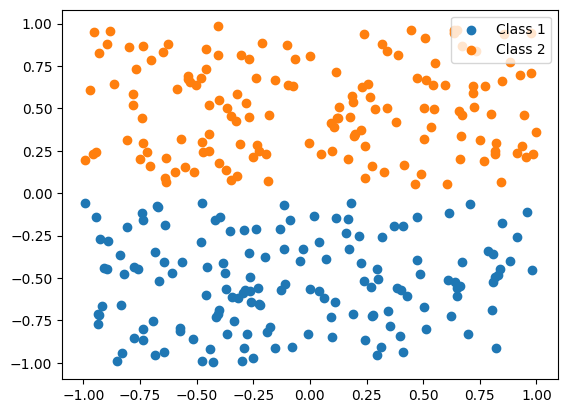

Data: [x, y, label]
 [[-0.4179 -0.8091  0.    ]
 [ 0.6298  0.1859  0.    ]
 [-0.0544  0.3875  1.    ]
 [-0.1737 -0.0005  1.    ]
 [-0.2587  0.876   0.    ]]


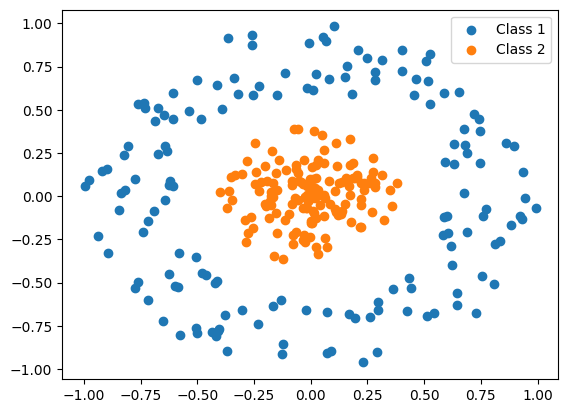

In [2]:
# linear seperable
data_linear = createDataLinear(150, 150)
print("Data: [x, y, label]\n", data_linear[0:5])

# divide into classes
class1_linear = data_linear[np.where(data_linear[:,2] == 0)]
class2_linear = data_linear[np.where(data_linear[:,2] == 1)]

plt.scatter(class1_linear[:,0], class1_linear[:,1], label="Class 1")
plt.scatter(class2_linear[:,0], class2_linear[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

# not linear seperable
data_circular = createDataCircular(150, 150)
print("Data: [x, y, label]\n", data_circular[0:5])

# divide into classes
class1_circular = data_circular[np.where(data_circular[:,2] == 0)]
class2_circular = data_circular[np.where(data_circular[:,2] == 1)]

plt.scatter(class1_circular[:,0], class1_circular[:,1], label="Class 1")
plt.scatter(class2_circular[:,0], class2_circular[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

### Create neural network

In [3]:
# First network, used on the linear data
nn_lin = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 2, hidden_units = [3, 3], activation = "tanh", output_activation = "sigmoid")
weights = nn_lin.weights()
print("First network weights, used on the linear data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

# Second network, used on the circular data
nn_circ = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 3, hidden_units = [15, 15, 15], activation = "tanh", output_activation = "sigmoid")
weights = nn_circ.weights()
print("\nSecond network weights, used on the circular data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

First network weights, used on the linear data:
(3, 2)
[[ 0.0865  0.4284]
 [-0.3942  0.161 ]
 [ 0.5926 -0.0481]]
(3, 3)
[[ 0.0202 -0.0505 -0.413 ]
 [ 0.4271  0.3327 -0.0606]
 [-0.4668  0.2431  0.172 ]]
(1, 3)
[[-0.5393 -0.38    0.2982]]

Second network weights, used on the circular data:
(15, 2)
[[-0.404   0.0019]
 [-0.5544 -0.0976]
 [ 0.139   0.1389]
 [ 0.0686 -0.0336]
 [ 0.7001 -0.426 ]
 [-0.525  -0.2264]
 [-0.0241 -0.2817]
 [-0.6642  0.1067]
 [-0.2133  0.5096]
 [ 0.4889  0.37  ]
 [-0.4852  0.4552]
 [-0.1374 -0.5151]
 [ 0.4414 -0.6968]
 [-0.3531  0.5284]
 [ 0.3995  0.3905]]
(15, 15)
[[ 0.2078  0.251  -0.0504  0.0401 -0.1103 -0.1142 -0.0639  0.1774  0.0676
  -0.2437 -0.0638 -0.0965 -0.1595  0.0811 -0.1476]
 [ 0.1222 -0.1404 -0.2425  0.0204 -0.1834  0.2027  0.212  -0.1267 -0.0111
   0.1517  0.0162  0.1445 -0.0916 -0.0027  0.0903]
 [-0.0283 -0.1173  0.1563  0.0736 -0.1212  0.1696 -0.2488  0.1909  0.1078
   0.0837 -0.1143 -0.177   0.0558 -0.1352  0.0461]
 [ 0.1982 -0.2339 -0.0121  0.2393

### Quick forward call

In [4]:
input = data_linear[0][0:2]
target = data_linear[0][2]
print("Input:", input, "- Label:", data_linear[0][2])
output = nn_lin.forward(input)
print("Model output:", output[0])
loss = BCELoss(output[0], target)
print("BCEloss gives:", loss)

Input: [ 0.8493 -0.1766] - Label: 0.0
Model output: 0.5367533179467486
BCEloss gives: 0.7694955761666534


### Train network on the two classes

In [5]:
# FOR LINEAR DATA
nr_epochs = 20
learning_rate = 0.01
running_loss = 0
loss_linear = []

# training loop (stochastic gradient descent)
for epoch in range(nr_epochs):
    for i in range(data_linear.shape[0]):
        # input
        input = data_linear[i][0:2]
        label = data_linear[i][2]
        
        # forward
        output = nn_lin.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn_lin.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn_lin.step(learning_rate)

        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss_linear.append(running_loss / data_linear.shape[0])
    running_loss = 0

# FOR CIRCULAR DATA (gradient descent)
nr_epochs = 100
learning_rate = 0.005
running_loss = 0
loss_circular = []

# training loop
for epoch in range(nr_epochs):
    for j in range(data_circular.shape[0]):
        # input
        input = data_circular[j][0:2]
        label = data_circular[j][2]
        
        # forward
        output = nn_circ.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn_circ.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn_circ.step(learning_rate)
        
        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss_circular.append(running_loss / data_circular.shape[0])
    running_loss = 0

### Weights after training


In [6]:
# First network, used on the linear data
nn_lin = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 3, hidden_units = [3, 3, 3], activation = "leaky_relu", output_activation = "sigmoid")
weights = nn_lin.weights()
print("First network weights, used on the linear data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

# Second network, used on the circular data
nn_circ = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 2, hidden_units = [15, 15], activation = "leaky_relu", output_activation = "sigmoid")
weights = nn_circ.weights()
print("\nSecond network weights, used on the circular data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

First network weights, used on the linear data:
(3, 2)
[[-0.4438 -0.1724]
 [ 0.6526  0.4673]
 [-0.091  -0.387 ]]
(3, 3)
[[ 0.0737 -0.0196 -0.0279]
 [ 0.1701 -0.0381 -0.0897]
 [ 0.3623 -0.2095 -0.2583]]
(3, 3)
[[ 0.5224  0.0276 -0.5076]
 [ 0.0683 -0.0227  0.3887]
 [-0.0623  0.3383 -0.5467]]
(1, 3)
[[-0.1996 -0.3543 -0.4503]]

Second network weights, used on the circular data:
(15, 2)
[[ 0.6878  0.2062]
 [-0.4912 -0.5984]
 [ 0.5274 -0.1998]
 [-0.0114 -0.3234]
 [-0.458   0.5154]
 [-0.394   0.3925]
 [-0.1229 -0.2752]
 [-0.1651  0.0573]
 [-0.1764 -0.5034]
 [ 0.3954 -0.2135]
 [-0.6471 -0.2046]
 [ 0.2954  0.0409]
 [ 0.0769 -0.1529]
 [ 0.0068  0.6987]
 [-0.6932  0.3678]]
(15, 15)
[[ 0.182   0.0081  0.1208  0.2327 -0.2213 -0.1784 -0.0655  0.0982 -0.1232
  -0.2241  0.044  -0.256   0.1891  0.1242  0.0418]
 [-0.1087 -0.016  -0.0784 -0.1975 -0.2043 -0.076   0.1097  0.1778  0.0153
  -0.2467  0.0286  0.1131  0.0994  0.2436 -0.1853]
 [ 0.2563 -0.11   -0.2201  0.1963  0.0579 -0.1843 -0.1793  0.0744 -0.

### Loss graphs

lin [0.7082184851084948, 0.6006271079381337, 0.29047112790962026, 0.08774743533514058, 0.02591365356807372, 0.008614943311032455, 0.003050728066164565, 0.0010913936332801175, 0.0003909017420560002, 0.00014004440849571423, 5.0176706280603055e-05, 1.7978447123771818e-05, 6.441797890930154e-06, 2.3081485962687636e-06, 8.270296172514026e-07, 2.9633202263691407e-07, 1.1643328667557086e-07, 1.0000000494736521e-07, 1.0000000494736521e-07, 1.0000000494736521e-07]


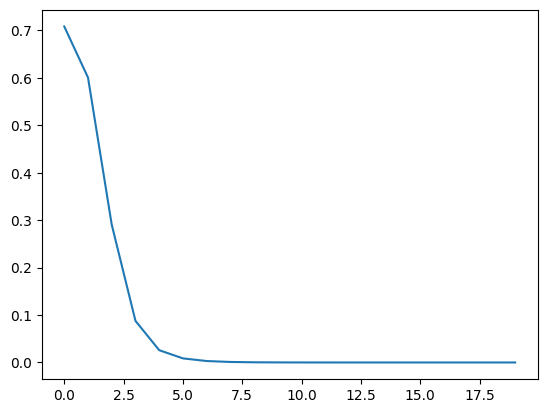

circ: [0.6939358721691881, 0.6938180281663, 0.6937263350895841, 0.6936535978633153, 0.693595050544804, 0.6935474022514662, 0.6935082975283474, 0.6934759969190316, 0.6934491806451321, 0.6934268240483151, 0.6934081163143994, 0.6933924060325422, 0.6933791637699255, 0.6933679556414252, 0.6933584241080206, 0.693350273613814, 0.6933432595296725, 0.6933371794144306, 0.6933318659504012, 0.6933271811305517, 0.6933230114149509, 0.6933192636626822, 0.6933158617012537, 0.6933127434305717, 0.6933098583810197, 0.6933071656598193, 0.6933046322301254, 0.693302231474854, 0.6932999420033846, 0.6932977466644459, 0.6932956317331318, 0.6932935862441664, 0.69329160144733, 0.6932896703643893, 0.6932877874299311, 0.6932859482012572, 0.693284149124839, 0.6932823873489303, 0.6932806605737101, 0.6932789669318022, 0.6932773048933579, 0.6932756731908711, 0.6932740707598529, 0.6932724966922, 0.6932709501996712, 0.6932694305854307, 0.6932679372219742, 0.6932664695341185, 0.693265026985969, 0.6932636090710242, 0.6932

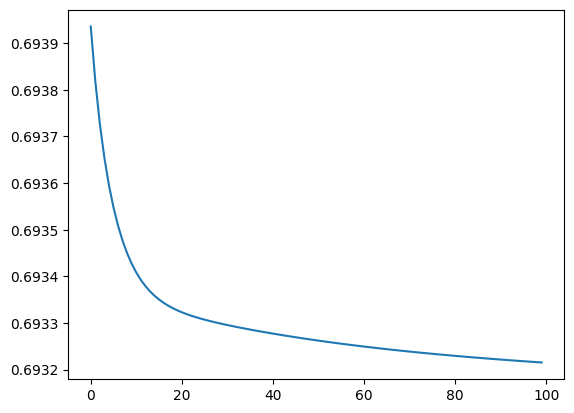

In [7]:
print("lin", loss_linear)
plt.plot(loss_linear)
plt.show()

print("circ:", loss_circular)
plt.plot(loss_circular)
plt.show()

### Decision boundary

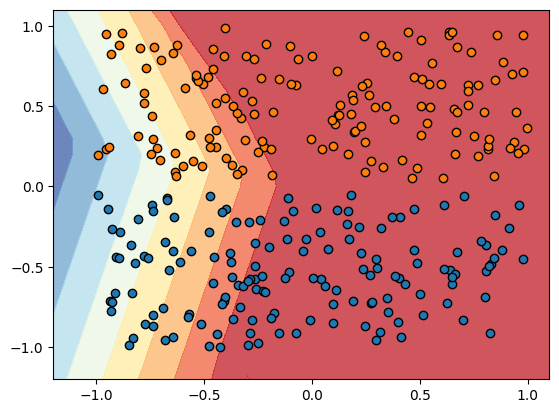

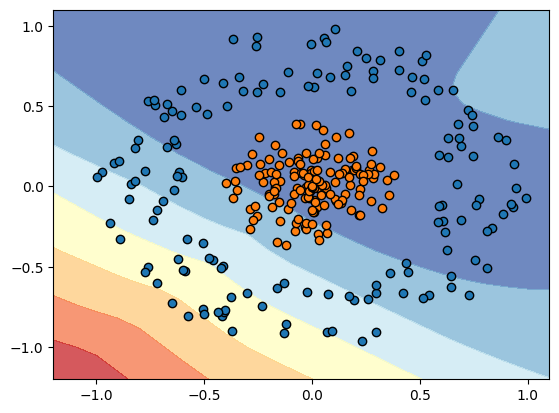

In [8]:
# define x and y scale
x1grid = np.arange(-1.2, 1.2, 0.1)
x2grid = np.arange(-1.2, 1.2, 0.1)

# create grid lines 
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
preds_lin = []
preds_circ = []
for i in range(grid.shape[0]):
    pred_lin = nn_lin.forward(grid[i]) 
    preds_lin.append(pred_lin)
    pred_circ = nn_circ.forward(grid[i]) 
    preds_circ.append(pred_circ)

# reshape the predictions back into a grid
preds_lin = np.array(preds_lin)
preds_circ = np.array(preds_circ)
grid_lin = preds_lin.reshape(xx.shape)
grid_circ = preds_circ.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
# plt.contourf(xx, yy, grid_lin, levels=1, cmap='RdYlBu_r', alpha = 0.75)
plt.contourf(xx, yy, grid_lin, cmap='RdYlBu_r', alpha = 0.75)
plt.scatter(class1_linear[:,0], class1_linear[:,1], label="Class 1", edgecolors='black')
plt.scatter(class2_linear[:,0], class2_linear[:,1], label="Class 2", edgecolors='black')
plt.show()
# plt.contourf(xx, yy, grid_circ, levels=1, cmap='RdYlBu_r', alpha = 0.75)
plt.contourf(xx, yy, grid_circ, cmap='RdYlBu_r', alpha = 0.75)
plt.scatter(class1_circular[:,0], class1_circular[:,1], label="Class 1", edgecolors='black')
plt.scatter(class2_circular[:,0], class2_circular[:,1], label="Class 2", edgecolors='black')
plt.show()
